# Laboration 2

## Import file and prepare the data
Separating values into multiple lists


In [42]:
import csv

#Set filepath
datapoint_txt = 'D:\ITHS\Github\Python-Rasmus-Berghall\Laborations\Lab2\Data\datapoints.txt'


with open(datapoint_txt) as f_datapoints:
    datapoints_reader = csv.reader(f_datapoints)
    datapoints = [row for row in datapoints_reader]

# Remove column-info from input file
datapoints = datapoints[1:]

#Setting labels for slicing-indexes of sublist(datapoint) in datapoints for readability
#One datapoint consist of [width[0], height[1], label[2]]
width = 0
height = 1
label = 2

# Create list of datapoints width-values
datapoints_width = [float(point[width].strip()) for point in datapoints]

# Create list of datapoints height-values
datapoints_height = [float(point[height].strip()) for point in datapoints]



## Plotting from datapoints

Plotting out every from input file 'datapoints.txt'  
where the x-axis is representing the width and the y-axis representing the height

Text(0.5, 0, 'Pokémon width')

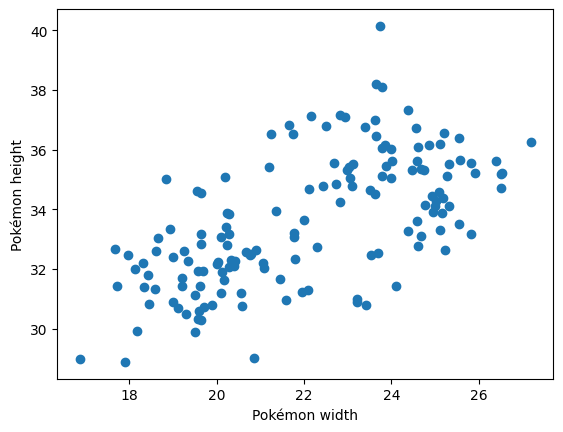

In [63]:
# Importera nödvändiga bibliotek 
import matplotlib.pyplot as plt

# Plot all points from datapoints
# The x-axis representing the width and y-axis representing the height
plt.scatter(datapoints_width, datapoints_height)
plt.ylabel('Pokémon height')
plt.xlabel('Pokémon width')



## Reading testpoints from file

Reading and preparing testpoints from file 'testpoints.txt'

In [64]:
#Set filepath
testpoints_txt = 'D:\ITHS\Github\Python-Rasmus-Berghall\Laborations\Lab2\Data\\testpoints.txt'

# Open and read the 'testpoints.txt'
with open(testpoints_txt) as f_testpoints: 
    testpoints_reader = csv.reader(f_testpoints)
    testpoints = [row for row in testpoints_reader]


# Removing first item from the list (labels)
testpoints = testpoints[1:]


# Splitting values for width and height to seperate lists 
testpoint_width = [float(point[0][4:].strip()) for point in testpoints]
testpoint_height = [float(point[1][:-1].strip()) for point in testpoints]


## Calculating the distance

Calculating the distance between the testpoints and datapoints (*trainingdata*).

Distance is calculated with the following formula:

```python

d = math.sqrt(x2-x1)**2 + (y2-y1)**2

```

#### Testing and verifying algorithm with given testdata:

In [65]:
import math

#Loop through the algorithm for every testpoint
for i in range(len(testpoint_height)):
    
    # Initialize distances and counter
    distances = []
    count = 0
    
    #Calculate the distance between the testpoint and all the datapoints
    while count < len(datapoints_height):
        distances.append(math.sqrt((datapoints_width[count] - testpoint_width[i])**2 + (datapoints_height[count] - testpoint_height[i])**2) )
        count += 1

    #Find smallest distance in calculated distances
    min_value = min(distances)

    #Find the index of the smallest value
    index_min_value = distances.index(min_value)    
    
    #Check label in datapoints with saved index for smallest value and print result for each testpoint
    if int(datapoints[index_min_value][label]) == 1: 
        pokémon = 'Pikachu'
    else: 
        pokémon = 'Pichu'

    print(f"Sample with (width, height): ({testpoint_width[i]}, {testpoint_height[i]}) classified as {pokémon}")


Sample with (width, height): (25.0, 32.0) classified as Pikachu
Sample with (width, height): (24.2, 31.5) classified as Pikachu
Sample with (width, height): (22.0, 34.0) classified as Pikachu
Sample with (width, height): (20.5, 34.0) classified as Pichu


# Uppgifter

#### 1. Låt användaren mata in en testpunkt och låt algoritmen avgöra dess klass. Ta med felhanteringen som tar hand om negativa tal och icke-numeriska inputs. Se till att ha användarvänliga felmeddelanden.  


In [69]:

#Get input from user, testpoint with width and height. 

print("""Please enter a testpoint (width and height) of your pokémon
and we'll see if I can decide if it's Pikachu or Pichu.
Enter a number (preferrably with one decimalpoint) 
between 19.0-29.0 for the width,
And a number (preferrably with one decimalpoint)
between 25.0-35.0 for the height""") 
print()

user_width = float(input("Enter the width: ").strip())



user_height = float(input("Enter the height: ").strip())



# Initialize distances and counter
distances = []
count = 0

while count < len(datapoints_height):
    distances.append(math.sqrt((datapoints_width[count] - user_width)**2 + (datapoints_height[count] - user_height)**2) )
    count += 1

min_value = min(distances)
index_min_value = distances.index(min_value)    

if int(datapoints[index_min_value][label]) == 1: 
    pokémon = 'Pikachu'
else: 
    pokémon = 'Pichu'

print(f"Your point ({user_width}, {user_height}), (width, height): classified as {pokémon}")



Please enter a testpoint (width and height) of your pokémon
and we'll see if I can decide if it's Pikachu or Pichu.
Enter a number (preferrably with one decimalpoint) 
between 19.0-29.0 for the width,
And a number (preferrably with one decimalpoint)
between 25.0-35.0 for the height

Your point (24.0, 43.0), (width, height): classified as Pikachu


#### 2. Klassificera input med dom 10 (11) närmsta punkterna istället för den närmsta punkten. Majoritetsröstning.

In [71]:

#Get input from user, testpoint with width and height. 
#print()
print("""Please enter a testpoint (width and height) of your pokémon
and we'll see if I can decide if it's Pikachu or Pichu.
Enter a number (preferrably with one decimalpoint) 
between 19.0-29.0 for the width,
And a number (preferrably with one decimalpoint)
between 25.0-35.0 for the height """) 
print()

user_width = float(input("Enter the width: "))

user_height = float(input("Enter the height: "))

# Initialize labels, distances and counter
labels = []
distances = []
count = 0

# Calculate the distancees between input point and datapoints,
# Save them to "distances"
while count < len(datapoints):
    distances.append(math.sqrt((datapoints_width[count] - user_width)**2 + (datapoints_height[count] - user_height)**2) )
    count += 1

# Loop through distances and get label for the smallest distance each time
for i in range(11):

    # Find smallest distance from calculation
    min_value = min(distances)
    
    # Find index of smallest distance from calculation
    index_min_value = distances.index(min_value)
    
    # Add the label from smallest value to list with labels
    labels.append(int(datapoints[index_min_value][label]))

    # Remove smallest item from distances before next loop
    distances.pop(index_min_value)


# If sum of saved labels is greater than 6, it is majority Pikachu(1), else Pichu(0)
# Print the result

if sum(labels) >= 6: 
    pokémon = 'Pikachu'
else: 
    pokémon = 'Pichu'

print(f"Your point ({user_width}, {user_height}), (width, height): classified as {pokémon} based on the 10 nearest values")


Please enter a testpoint (width and height) of your pokémon
and we'll see if I can decide if it's Pikachu or Pichu.
Enter a number (preferrably with one decimalpoint) 
between 19.0-29.0 for the width,
And a number (preferrably with one decimalpoint)
between 25.0-35.0 for the height 

Your point (23.0, 33.0), (width, height): classified as Pikachu based on the 10 nearest values


#### 3. Dela in ursprungsdatan slumpmässigt så att: 
- 100 är träningsdata (50 Pikachu, 50 Pichu)
- 50 är testdata (25 Pikachu, 25 Pichu)


In [84]:

pikachu_point = [point for point in datapoints if int(point[label]) == 1]
pichu_point = [point for point in datapoints if not int(point[label]) == 1]

print(pikachu_point)
print(pichu_point)


[['23.63591632187622', ' 36.46821490673444', ' 1'], ['21.78020031891186', ' 33.213397759738264', ' 1'], ['25.20630552859312', ' 36.558816149350534', ' 1'], ['24.73645685241186', ' 35.33291181124776', ' 1'], ['23.79257560586339', ' 38.10372825362463', ' 1'], ['24.557612968127465', ' 36.73144402805611', ' 1'], ['25.813562951888365', ' 35.561029988644336', ' 1'], ['24.923378667802954', ' 34.463907946680294', ' 1'], ['25.311244044578427', ' 34.117212558131975', ' 1'], ['22.819091361866796', ' 34.25516433025548', ' 1'], ['22.723629043769336', ' 34.83845262048311', ' 1'], ['25.82936770950206', ' 33.16210202637511', ' 1'], ['24.385289647525166', ' 37.335669057387726', ' 1'], ['26.525412887538252', ' 35.2192205449002', ' 1'], ['22.980962976720388', ' 35.3191819848619', ' 1'], ['25.17676132371397', ' 34.393601274285054', ' 1'], ['24.68867147060795', ' 35.363481550256644', ' 1'], ['23.02865997158701', ' 35.4082866561793', ' 1'], ['23.868174335146136', ' 35.449698119416254', ' 1'], ['26.388368121

#### 4. Beräkna noggranheten genom följande formel: 
 
accuracy = (#TP+#TN)/(total)
 
|        | Pikachu Actual | Pichu Actual  |
|------------| -------------- | --------------|
| Pikachu Predicted | TP      |     FP        |  
| Pichu Predicted | FN      |     TN        |  
